In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint

In [2]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
purchases = pd.read_csv(r'cohort.csv')
purchases.head(5)

,installDate,userID,configTag,platform,userCountry,media_source,rev_1day,rev_7day,rev_total
0,2023-04-03T00:43:31.908000,8ed7ed78-d1b8-11ed-9d30-666ab5f888d6,B,IOS,SA,restricted,0.0,0.0,0.0
1,2023-04-02T23:59:11.763000,5d461cd4-d1b2-11ed-9d30-666ab5f888d6,B,Android,DO,Organic,0.0,0.0,0.0
2,2023-03-30T03:17:58.597000,78919e66-cea9-11ed-9d5e-aafdf8ffc125,A,Android,YE,Adwords,0.0,0.0,0.0
3,2023-04-04T23:03:57.393000,fa94f19c-d33c-11ed-9d30-666ab5f888d6,B,Android,PT,Adwords,0.0,0.0,0.0
4,2023-03-30T10:52:37.080000,fbcfa331-cee8-11ed-9d30-666ab5f888d6,B,Android,JO,FB,0.0,0.0,0.0


In [4]:
purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45078 entries, 0 to 45077
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   installDate   45078 non-null  object 
 1   userID        45078 non-null  object 
 2   configTag     45078 non-null  object 
 3   platform      45078 non-null  object 
 4   userCountry   42180 non-null  object 
 5   media_source  42211 non-null  object 
 6   rev_1day      45078 non-null  float64
 7   rev_7day      45078 non-null  float64
 8   rev_total     45078 non-null  float64
dtypes: float64(3), object(6)
memory usage: 3.1+ MB


In [5]:
purchases.groupby('configTag')['userID'].nunique()

configTag
A    21553
B    21535
C      640
D      693
E      657
Name: userID, dtype: int64

In [6]:
purchases[purchases['configTag'] == 'A'].describe()

,rev_1day,rev_7day,rev_total
count,21553.000000,21553.000000,21553.000000
mean,0.105003,0.166658,0.166658
std,1.884059,3.826842,3.826842
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,114.940000,421.510000,421.510000


In [7]:
purchases[purchases['configTag'] == 'B'].describe()

,rev_1day,rev_7day,rev_total
count,21535.000000,21535.000000,21535.000000
mean,0.095630,0.160740,0.160762
std,1.899309,2.922836,2.922837
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,126.890000,168.760000,168.760000


In [8]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries.round(decimals=2)

In [9]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

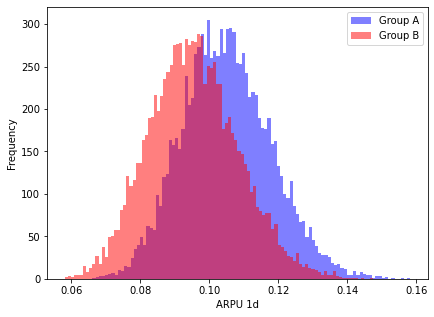

95% confidence interval for mean group A: [0.08 0.13]
95% confidence interval for mean group B: [0.07 0.12]


In [19]:
groupA_median_scores = list(map(np.mean, get_bootstrap_samples(purchases[purchases['configTag'] == 'A']['rev_1day'].values, 10000)))
groupB_median_scores = list(map(np.mean, get_bootstrap_samples(purchases[purchases['configTag'] == 'B']['rev_1day'].values, 10000)))

pylab.figure(figsize(15, 5))
pylab.subplot(1,2,1)
pylab.hist(groupA_median_scores, alpha = .5, color = 'b', label = 'Group A', bins = 100)
pylab.legend()

pylab.subplot(1,2,1)
pylab.hist(groupB_median_scores, alpha = .5, color = 'r', label = 'Group B', bins = 100)
pylab.legend()

# pylab.subplot(1,2,1)
# pylab.hist(groupC_median_scores, alpha = .5, color = 'g', label = 'Group C ARPU 1d', bins = 100)
# pylab.legend()

pylab.ylabel('Frequency') 
pylab.xlabel('ARPU 1d') 
pylab.show()

print("95% confidence interval for mean group A:",  stat_intervals(groupA_median_scores, 0.05))
print("95% confidence interval for mean group B:",  stat_intervals(groupB_median_scores, 0.05))

In [18]:
scipy.stats.mannwhitneyu(purchases[purchases['configTag'] == 'A']['rev_1day'].values, purchases[purchases['configTag'] == 'B']['rev_1day'].values, use_continuity=True, alternative='greater')

MannwhitneyuResult(statistic=232306878.0, pvalue=0.15013608089978636)

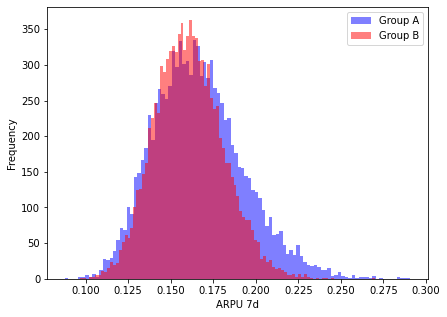

95% confidence interval for mean group A: [0.12 0.22]
95% confidence interval for mean group B: [0.12 0.2 ]


In [20]:
groupA_median_scores = list(map(np.mean, get_bootstrap_samples(purchases[purchases['configTag'] == 'A']['rev_7day'].values, 10000)))
groupB_median_scores = list(map(np.mean, get_bootstrap_samples(purchases[purchases['configTag'] == 'B']['rev_7day'].values, 10000)))

pylab.figure(figsize(15, 5))
pylab.subplot(1,2,1)
pylab.hist(groupA_median_scores, alpha = .5, color = 'b', label = 'Group A', bins = 100)
pylab.legend()

pylab.subplot(1,2,1)
pylab.hist(groupB_median_scores, alpha = .5, color = 'r', label = 'Group B', bins = 100)
pylab.legend()

# pylab.subplot(1,2,1)
# pylab.hist(groupC_median_scores, alpha = .5, color = 'g', label = 'Group C ARPU 1d', bins = 100)
# pylab.legend()

pylab.ylabel('Frequency') 
pylab.xlabel('ARPU 7d') 
pylab.show()

print("95% confidence interval for mean group A:",  stat_intervals(groupA_median_scores, 0.05))
print("95% confidence interval for mean group B:",  stat_intervals(groupB_median_scores, 0.05))

In [21]:
scipy.stats.mannwhitneyu(purchases[purchases['configTag'] == 'A']['rev_7day'].values, purchases[purchases['configTag'] == 'B']['rev_7day'].values, use_continuity=True, alternative='greater')

MannwhitneyuResult(statistic=232251552.0, pvalue=0.2438007439001349)

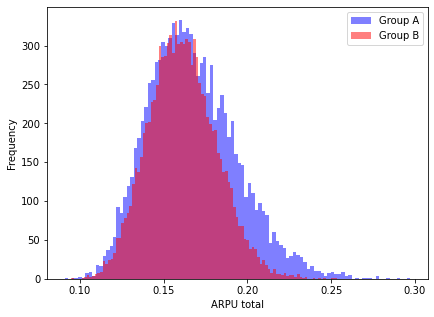

95% confidence interval for mean group A: [0.12 0.23]
95% confidence interval for mean group B: [0.12 0.2 ]


In [30]:
groupA_median_scores = list(map(np.mean, get_bootstrap_samples(purchases[purchases['configTag'] == 'A']['rev_total'].values, 10000)))
groupB_median_scores = list(map(np.mean, get_bootstrap_samples(purchases[purchases['configTag'] == 'B']['rev_total'].values, 10000)))

pylab.figure(figsize(15, 5))
pylab.subplot(1,2,1)
pylab.hist(groupA_median_scores, alpha = .5, color = 'b', label = 'Group A', bins = 100)
pylab.legend()

pylab.subplot(1,2,1)
pylab.hist(groupB_median_scores, alpha = .5, color = 'r', label = 'Group B', bins = 100)
pylab.legend()

# pylab.subplot(1,2,1)
# pylab.hist(groupC_median_scores, alpha = .5, color = 'g', label = 'Group C ARPU 1d', bins = 100)
# pylab.legend()

pylab.ylabel('Frequency') 
pylab.xlabel('ARPU total') 
pylab.show()

print("95% confidence interval for mean group A:",  stat_intervals(groupA_median_scores, 0.05))
print("95% confidence interval for mean group B:",  stat_intervals(groupB_median_scores, 0.05))

In [31]:
scipy.stats.mannwhitneyu(purchases[purchases['configTag'] == 'A']['rev_total'].values, purchases[purchases['configTag'] == 'B']['rev_total'].values, use_continuity=True, alternative='greater')

MannwhitneyuResult(statistic=232240882.0, pvalue=0.2570888437390145)

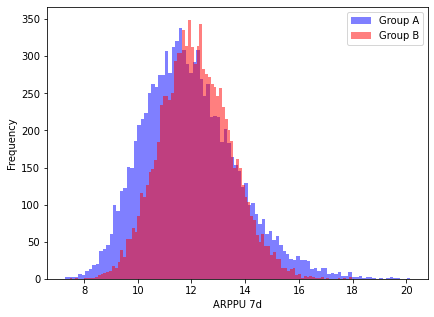

95% confidence interval for mean group A: [ 9.03 15.87]
95% confidence interval for mean group B: [ 9.72 14.85]


In [45]:
groupA_median_scores = list(map(np.mean, get_bootstrap_samples(purchases[(purchases['configTag'] == 'A') & (purchases['rev_7day'] > 0)]['rev_7day'].values, 10000)))
groupB_median_scores = list(map(np.mean, get_bootstrap_samples(purchases[(purchases['configTag'] == 'B') & (purchases['rev_7day'] > 0)]['rev_7day'].values, 10000)))

pylab.figure(figsize(15, 5))
pylab.subplot(1,2,1)
pylab.hist(groupA_median_scores, alpha = .5, color = 'b', label = 'Group A', bins = 100)
pylab.legend()

pylab.subplot(1,2,1)
pylab.hist(groupB_median_scores, alpha = .5, color = 'r', label = 'Group B', bins = 100)
pylab.legend()

# pylab.subplot(1,2,1)
# pylab.hist(groupC_median_scores, alpha = .5, color = 'g', label = 'Group C ARPU 1d', bins = 100)
# pylab.legend()

pylab.ylabel('Frequency') 
pylab.xlabel('ARPPU 7d') 
pylab.show()

print("95% confidence interval for mean group A:",  stat_intervals(groupA_median_scores, 0.05))
print("95% confidence interval for mean group B:",  stat_intervals(groupB_median_scores, 0.05))

In [46]:
scipy.stats.mannwhitneyu(purchases[(purchases['configTag'] == 'A') & (purchases['rev_7day'] > 0)]['rev_7day'].values, purchases[(purchases['configTag'] == 'B') & (purchases['rev_7day'] > 0)]['rev_7day'].values, use_continuity=True, alternative='greater')

MannwhitneyuResult(statistic=41875.0, pvalue=0.664899620358735)

In [25]:
countries_A = purchases[purchases['configTag'] == 'A'].groupby('userCountry')['userID'].nunique().sort_values()
countries_A.tail(10)

userCountry
BR     570
DE     617
PH     651
IQ     737
TH     901
ID     923
UA     930
IN     997
US    1012
RU    1913
Name: userID, dtype: int64

In [26]:
countries_B = purchases[purchases['configTag'] == 'B'].groupby('userCountry')['userID'].nunique().sort_values()
countries_B.tail(10)

userCountry
BR     612
DE     615
PH     651
IQ     759
TH     896
UA     920
ID     937
IN     971
US    1022
RU    1939
Name: userID, dtype: int64

In [28]:
media_source_A = purchases[purchases['configTag'] == 'A'].groupby('media_source')['userID'].nunique().sort_values()
media_source_A.tail(10)

media_source
Influencers        4
TikTok            87
UnityAds         152
restricted       579
Adwords         2861
FB              3024
Organic        13498
Name: userID, dtype: int64

In [29]:
media_source_B = purchases[purchases['configTag'] == 'B'].groupby('media_source')['userID'].nunique().sort_values()
media_source_B.tail(10)

media_source
Influencers        2
TikTok            86
UnityAds         117
restricted       525
Adwords         2930
FB              2966
Organic        13602
Name: userID, dtype: int64

In [36]:
money_spent_A = purchases[purchases['configTag'] == 'A']['rev_7day'].apply(lambda x: 0 if x == 0 else '<10$' if x < 10 else '10-50$' if x >= 10 and x < 50 else '50-100$' if x >= 50 and x < 100 else '>=100$' if x >= 100 else 'Other')
money_spent_A.value_counts()

0          21252
<10$         225
10-50$        66
>=100$         5
50-100$        5
Name: rev_7day, dtype: int64

In [37]:
money_spent_B = purchases[purchases['configTag'] == 'B']['rev_7day'].apply(lambda x: 0 if x == 0 else '<10$' if x < 10 else '10-50$' if x >= 10 and x < 50 else '50-100$' if x >= 50 and x < 100 else '>=100$' if x >= 100 else 'Other')
money_spent_B.value_counts()

0          21251
<10$         210
10-50$        58
50-100$       12
>=100$         4
Name: rev_7day, dtype: int64

In [42]:
revenues_A = purchases[purchases['configTag'] == 'A']['rev_7day'].sort_values()
revenues_A.tail(10)

2561      56.18
37998     61.92
38497     68.97
24767     72.95
42169     94.97
24375    101.93
38508    120.92
24463    135.82
35950    147.85
1483     421.51
Name: rev_7day, dtype: float64

In [43]:
revenues_B = purchases[purchases['configTag'] == 'B']['rev_7day'].sort_values()
revenues_B.tail(10)

4340      74.93
27349     85.94
42524     86.35
43510     87.92
42522     92.91
41484     99.90
42229    114.89
41815    126.89
41987    141.25
43089    168.76
Name: rev_7day, dtype: float64